# iFood Dev Week

Saiba mais sobre essa semana incrível nos artigos:
- [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week)
- [Fechando a iFood Dev Week Com Chave de Ouro](https://web.dio.me/articles/fechando-a-ifood-dev-week-com-chave-de-ouro)

## Dia 1: [Conheça o Google Colab e o Projeto Desta Dev Week](https://www.youtube.com/live/59XwC5e8U1k?feature=share)

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [1]:
!pip install gdown==v4.6
import pandas as pd
import gdown

#Lendo os dados
#https://drive.google.com/file/d/12ulwHDPxg8V1QWfneBx5Vlf59aVAPvbA/view?usp=drive_link
file_id = '12ulwHDPxg8V1QWfneBx5Vlf59aVAPvbA'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

dados = pd.read_csv('feedbacks.csv', sep=";")
notas = dados['nota']

Downloading...
From: https://drive.google.com/uc?id=12ulwHDPxg8V1QWfneBx5Vlf59aVAPvbA
To: /content/feedbacks.csv
100%|██████████| 365/365 [00:00<00:00, 807kB/s]


In [2]:
"""
Versão 1: Paradigma Imperativo.

Este script lê um arquivo CSV contendo feedback de usuários, no qual cada feedback tem uma nota associada.
O NPS é calculado como a diferença entre o percentual de promotores (nota >= 9) e detratores (nota <= 6), multiplicada por 100.
A implementação é realizada de uma maneira imperativa, onde os comandos são executados sequencialmente.
"""

#detratores = 0
#promotores = 0

#for nota in notas:
#  if nota >= 9:
#    promotores += 1
#  elif nota <=6:
#    detratores += 1

#nps = (promotores - detratores) / len(notas) * 100
#print(nps)

'\nVersão 1: Paradigma Imperativo.\n\nEste script lê um arquivo CSV contendo feedback de usuários, no qual cada feedback tem uma nota associada.\nO NPS é calculado como a diferença entre o percentual de promotores (nota >= 9) e detratores (nota <= 6), multiplicada por 100.\nA implementação é realizada de uma maneira imperativa, onde os comandos são executados sequencialmente.\n'

In [3]:
"""
Versão 2: Paradigma Funcional.

Este código segue uma abordagem funcional para calcular o NPS a partir dos dados de feedback.
A função "calcular_nps" é definida para encapsular a lógica do cálculo do NPS. Esta versão apresenta
uma separação de responsabilidades mais clara do que a versão imperativa, além de melhorias de código pontuais.
"""

def calcular_nps(notas):
  detratores = 0
  promotores = 0

  for nota in notas:
    if nota >= 9:
      promotores += 1
    elif nota <=6:
      detratores += 1

  nps = (promotores - detratores) / len(notas) * 100
  return nps


print(calcular_nps(notas))


37.5


In [4]:
"""
Versão 3: Paradigma Orientado a Objetos (POO).

Este script adota uma abordagem Orientada a Objetos (OO) para calcular o NPS a partir de feedback de usuários.
Duas classes são definidas, onde:
- Feedback representa um único feedback de usuário;
- AnalisadorFeedback é usado para calcular o NPS a partir de uma lista de Feedbacks.
A POO fornece uma abstração mais clara dos dados e comportamentos envolvidos no cálculo do NPS.
Desta forma, nossa solução estará preparada para as evoluções do nosso projeto.
"""

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    return (promotores - detratores) / len(self.feedbacks) * 100


feedbacks = [Feedback(linha['nota'], linha['comentario']) for i, linha in dados.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

37.5


## Dia 2: [Desvendando o Poder dos Seus Dados com Python](https://www.youtube.com/live/2Y59NEO9KU4?feature=share)

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

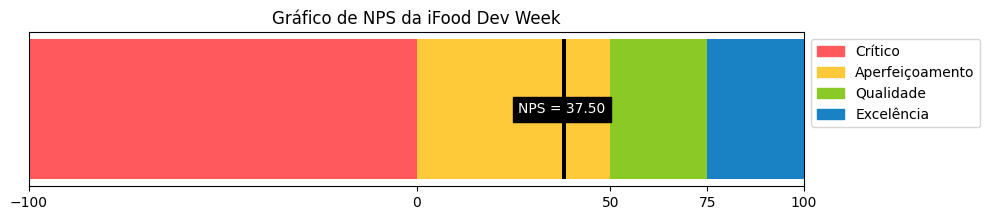

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

NPS_ZONAS = ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

def criar_grafico_nps(nps):
 fig, ax = plt.subplots(figsize=(10, 2))

 for i, zona in enumerate(NPS_ZONAS):
  ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

 ax.barh([0], width=1, left=nps, color='black')
 ax.set_yticks([])
 ax.set_xlim(-100, 100)
 ax.set_xticks(NPS_VALORES)

 plt.text(nps, 0, f'NPS = {nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

 patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
 plt.legend(handles=patches, bbox_to_anchor=(1,1))
 plt.title('Gráfico de NPS da iFood Dev Week')


 plt.show()

criar_grafico_nps(nps)

## Dia 3: [Decifrando Sentimentos com Inteligência Artificial (IA)](https://www.youtube.com/live/wj9tVSWVzOM?feature=share)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.

In [6]:
!pip install openai==v0.27.8

  Using cached openai-0.27.8-py3-none-any.whl (73 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.25.0
    Uninstalling openai-0.25.0:
      Successfully uninstalled openai-0.25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [10]:
# Documentação Oficial da API OpenAI: https://platform.openai.com/docs/api-reference/introduction
# Informações sobre o Período Gratuito: https://help.openai.com/en/articles/4936830

# Para gerar uma API Key:
# 1. Crie uma conta na OpenAI
# 2. Acesse a seção "API Keys"
# 3. Clique em "Create API Key"
# Link direto: https://platform.openai.com/account/api-keys

# Substitua o texto TODO por sua API Key da OpenAI, ela será salva como uma variável de ambiente.
openai_api_key = 'Minha Chave API da OpenIA'

In [11]:
"""
Integrar com o ChatGPT e usá-lo como um modelo para análise de sentimentos dos nossos comentários.
Seguem alguns links úteis:
1. Endpoint que vamos consumir: https://platform.openai.com/docs/api-reference/chat/create
2. Collection Postman da OpenAI: https://www.postman.com/devrel/workspace/openai/documentation/13183464-90abb798-cb85-43cb-ba3a-ae7941e968da
"""

import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):

  comentarios_formatados = "\n".join([f"- Nota {feedback.nota}! {feedback.comentario}" for feedback in feedbacks])

  prompt = f"""
            Sintetize uma análise geral sobre os seguintes comentário:
            {comentarios_formatados}
            """

  respostaAPI = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
      {
          "role": "system",
          "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
      },
      {
          "role": "user",
          "content": prompt
      }
    ]
  )
  return respostaAPI.choices[0].message.content

insigths = analisar_sentimentos(feedbacks)
print(insigths)

Após analisar os comentários, é possível observar que a maioria dos feedbacks é positiva em relação ao bootcamp educacional. A maioria dos participantes avaliou a experiência com notas 9 ou 10, elogiando a qualidade do curso e demonstrando satisfação com o conteúdo oferecido.

No entanto, alguns comentários apontaram sugestões de melhoria. Um participante mencionou a importância de ter mentorias específicas na área de Inteligência Artificial, enquanto outro comentou sobre a preferência por um próximo bootcamp de Python.

Além disso, houve um comentário que classificou o bootcamp como razoável, mas demonstrando interesse em participar de um próximo.

No geral, a maioria dos participantes teve uma experiência positiva e recomendou o bootcamp, destacando a importância da educação aberta e elogiando a qualidade do programa. No entanto, é válido considerar as sugestões dos participantes e buscar maneiras de melhorar a experiência para futuras edições, como a inclusão de mentorias especializ